In [50]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

In [51]:
model = joblib.load('../../models/rf_harvest_model.pkl')

# Carica i dati
features = pd.read_csv("../../data/processed/features_esp.csv")

# Seleziona le caratteristiche e il target
X = features[['alt', 'lat', 'lon', 'superficie_media', 'prec_media', 'temp_media']]

X = X.rename(columns={
    'superficie_media': 'superficie',
    'prec_media': 'prec',
    'temp_media': 'temp'
})

y = features['produzione_media']

# Visualizza dataset
display(X)
display(y)

,alt,lat,lon,superficie,prec,temp
0,276.0,43.166667,-8.416667,1745.090909,1050.0,15.00
1,406.0,38.666667,-6.166667,70709.818182,450.0,17.45
2,513.0,41.666667,2.000000,23458.909091,600.0,16.70
3,712.0,39.000000,-4.000000,46944.181818,400.0,15.95
4,958.0,40.000000,-2.000000,38564.000000,500.0,13.65
5,455.0,39.666667,-6.000000,4920.818182,545.0,16.50
6,186.0,36.500000,-5.750000,63852.363636,525.0,18.75
7,449.0,38.000000,-4.833333,71360.545455,100.0,18.45
8,1077.0,37.250000,-3.250000,13231.272727,355.0,15.95
9,1068.0,40.833333,-2.500000,65761.272727,43.0,13.80


0     6.066727e+04
1     1.843486e+06
2     9.650609e+05
3     1.056415e+06
4     1.156117e+06
5     1.022709e+05
6     1.780356e+06
7     2.230908e+06
8     2.423664e+05
9     1.888475e+06
10    5.260778e+05
11    2.697133e+06
12    2.284955e+05
13    1.370000e+03
14    2.318593e+06
15    2.152198e+06
16    7.937818e+04
17    5.025727e+05
18    7.539091e+03
19    2.224137e+06
20    2.137111e+06
21    4.784725e+06
22    2.466427e+05
23    1.300483e+06
24    3.624754e+06
25    2.301741e+06
26    3.872586e+06
27    1.149425e+06
Name: produzione_media, dtype: float64

In [52]:
predictions = model.predict(X)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y, predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - predictions) / y)) * 100

# Explained Variance Score
evs = explained_variance_score(y, predictions)

# Max Error
max_err = max_error(y, predictions)

# Median Absolute Error
medae = median_absolute_error(y, predictions)

# Stampa formattata con f-string
print(f"{'Metriche':<50} {'Valori':>10}")
print("=" * 60)
print(f"{'Mean Absolute Error (MAE):':<50} {mae:.2f}")
print(f"{'Mean Squared Error (MSE):':<50} {mse:.2f}")
print(f"{'Root Mean Squared Error (RMSE):':<50} {rmse:.2f}")
print(f"{'R-squared (R²):':<50} {r2:.2f}")
print(f"{'Mean Absolute Percentage Error (MAPE):':<50} {mape:.2f}%")
print(f"{'Explained Variance Score:':<50} {evs:.2f}")
print(f"{'Max Error:':<50} {max_err:.2f}")
print(f"{'Median Absolute Error:':<50} {medae:.2f}")


Metriche                                               Valori
Mean Absolute Error (MAE):                         548231.66
Mean Squared Error (MSE):                          640150875711.08
Root Mean Squared Error (RMSE):                    800094.29
R-squared (R²):                                    0.59
Mean Absolute Percentage Error (MAPE):             60.59%
Explained Variance Score:                          0.61
Max Error:                                         2386691.09
Median Absolute Error:                             326732.98


In [53]:
errors = y - predictions

error_df = pd.DataFrame({
    'provincia': features['provincia'],
    'errore': errors,
    'lat': X['lat'],
    'lon': X['lon'],
    'alt': X['alt']
})

display(error_df)

,provincia,errore,lat,lon,alt
0,A Coruña,-2.564516e+04,43.166667,-8.416667,276.0
1,Badajoz,-5.545480e+05,38.666667,-6.166667,406.0
2,Barcelona,-1.131771e+06,41.666667,2.000000,513.0
3,Ciudad Real,-1.341619e+06,39.000000,-4.000000,712.0
4,Cuenca,-1.173771e+06,40.000000,-2.000000,958.0
5,Cáceres,-8.084142e+04,39.666667,-6.000000,455.0
6,Cádiz,-6.176780e+05,36.500000,-5.750000,186.0
7,Córdoba,-1.671262e+05,38.000000,-4.833333,449.0
8,Granada,-4.934410e+05,37.250000,-3.250000,1077.0
9,Guadalajara,-4.414140e+05,40.833333,-2.500000,1068.0


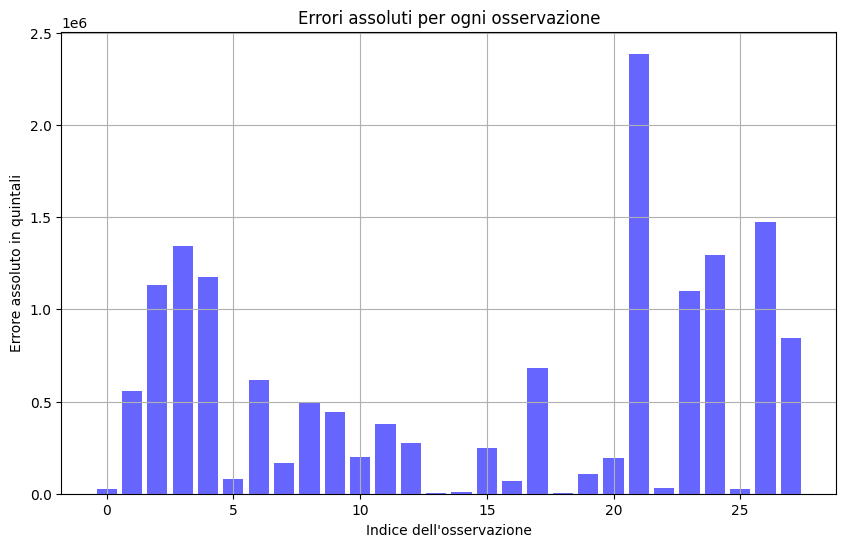

In [54]:
residuals = y - predictions

errors = np.abs(residuals)

plt.figure(figsize=(10, 6))
plt.bar(range(len(errors)), errors, color='blue', alpha=0.6)
plt.title('Errori assoluti per ogni osservazione')
plt.xlabel('Indice dell\'osservazione')
plt.ylabel('Errore assoluto in quintali')
plt.grid(True)
plt.show()


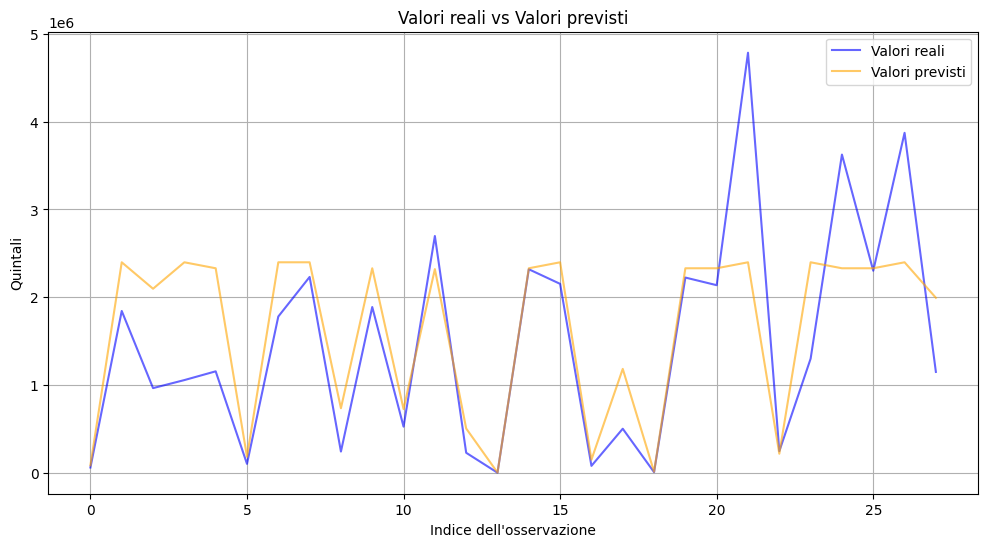

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(y.reset_index(drop=True), label='Valori reali', color='blue', alpha=0.6)
plt.plot(predictions, label='Valori previsti', color='orange', alpha=0.6)
plt.title('Valori reali vs Valori previsti')
plt.xlabel('Indice dell\'osservazione')
plt.ylabel('Quintali')
plt.legend()
plt.grid(True)
plt.show()


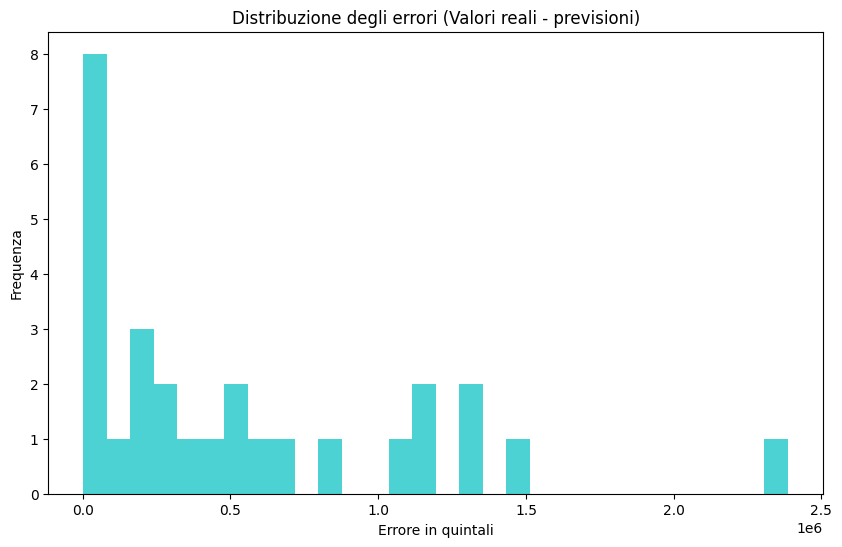

In [56]:
plt.figure(figsize=(10, 6))

# Istogramma degli errori
plt.hist(errors, bins=30, color='c', alpha=0.7)
plt.title('Distribuzione degli errori (Valori reali - previsioni)')
plt.xlabel('Errore in quintali')
plt.ylabel('Frequenza')
plt.show()

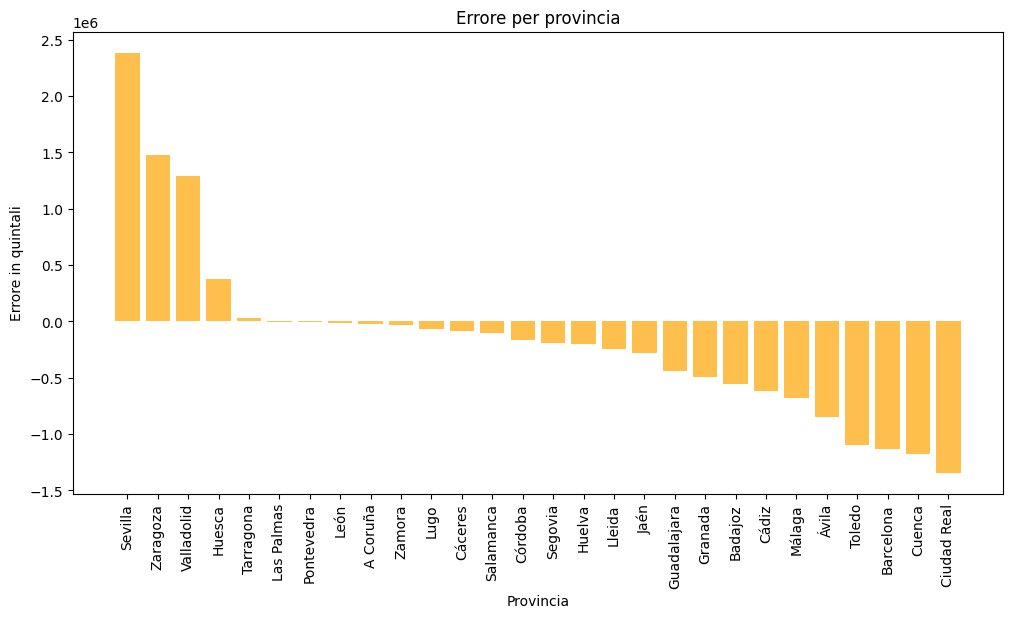

In [57]:
plt.figure(figsize=(12, 6))

# Ordina l'errore per provincia
error_df_sorted = error_df.sort_values(by='errore', ascending=False)

# Grafico a barre degli errori
plt.bar(error_df_sorted['provincia'], error_df_sorted['errore'], color='orange', alpha=0.7)
plt.xticks(rotation=90)  # Ruota i nomi delle province
plt.title('Errore per provincia')
plt.xlabel('Provincia')
plt.ylabel('Errore in quintali')
plt.show()